<a href="https://colab.research.google.com/github/cleifton/Data_Science/blob/master/Analise%20Ocupa%C3%A7%C3%A3o%20Alugueis%20Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


#Analise de Alugueis Airbnb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Importação de dados

df = pd.read_csv ("http://data.insideairbnb.com/united-states/nc/asheville/2021-12-15/visualisations/listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,120,30,89,2019-11-30,0.71,2,344,0,NaN
1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,347,2021-12-05,2.75,7,244,68,NaN
2,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.54,7,0,0,NaN
3,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Shared room,33,1,296,2021-11-14,2.36,7,262,15,NaN
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.46,1,0,0,NaN


In [4]:
df.shape

(2626, 18)

In [5]:
print("variaveis:\t{}".format(df.shape[0]))
print("Entradas:\t{}".format(df.shape[1]))

display(df.dtypes)

variaveis:	2626
Entradas:	18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [6]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.052932
last_review                       0.052932
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [7]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2626
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        139
reviews_per_month                  139
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2626
dtype: int64

In [8]:
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.052932
reviews_per_month                 0.052932
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           1.000000
dtype: float64

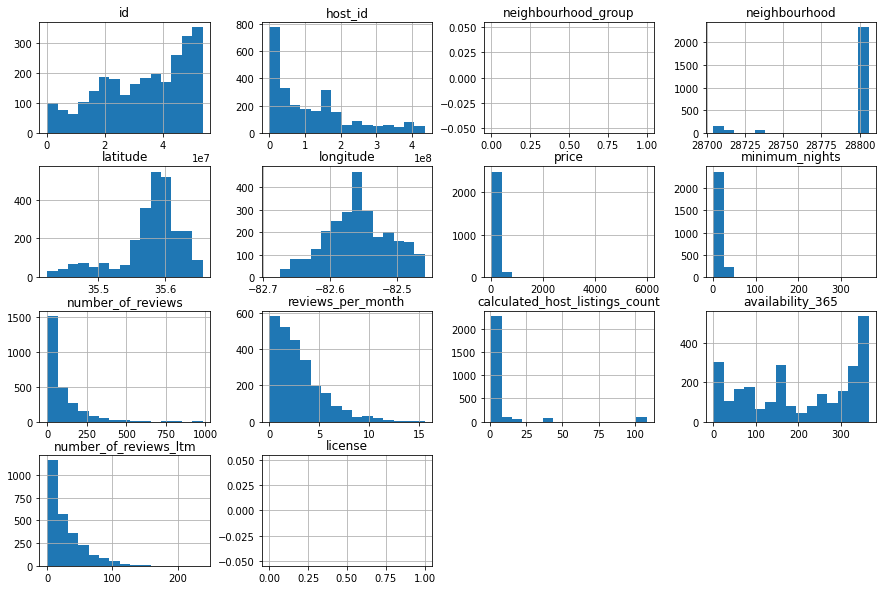

In [9]:
df.hist(bins=15, figsize=(15,10));

In [10]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,2626.000000,2626.000000,2626.000000,2487.000000
mean,182.612338,5.211729,88.066641,2.954576
std,192.963345,13.528865,110.543305,2.403260
min,19.000000,1.000000,0.000000,0.010000
25%,93.000000,1.000000,13.000000,1.140000
50%,134.000000,2.000000,50.500000,2.370000
75%,218.750000,2.000000,123.000000,4.045000
max,6000.000000,365.000000,982.000000,15.560000


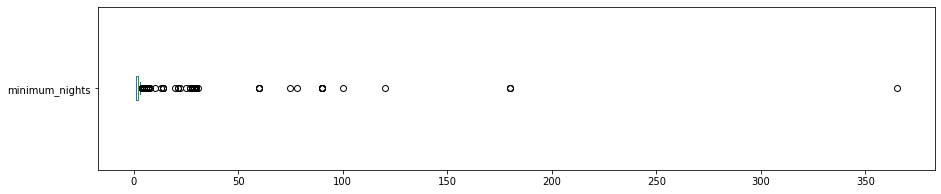

minimum_nights: valores acima de 30:=
19 entradas
0.7235% 


In [11]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: valores acima de 30:=")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}% ".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))




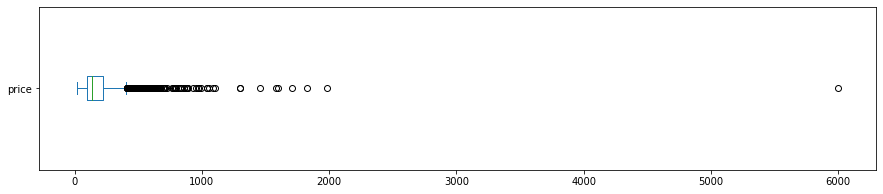

In [12]:
#Price

df.price.plot(kind='box' , vert=False, figsize=(15,3),)
plt.show()
print()

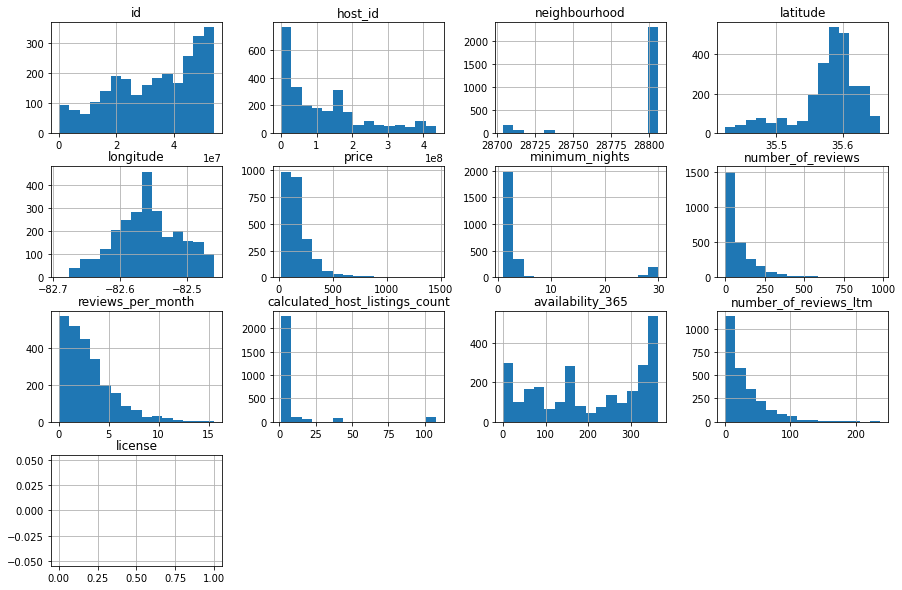

In [13]:


#remover os outliers e novo dataframe

df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(15,10));

In [21]:
#Variação de Precos

corr = df_clean [['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.135936,-0.205692,-0.203972,0.271846,0.215142
minimum_nights,-0.135936,1.000000,-0.167146,-0.289313,-0.121382,-0.113486
number_of_reviews,-0.205692,-0.167146,1.000000,0.582844,-0.152921,-0.016721
reviews_per_month,-0.203972,-0.289313,0.582844,1.000000,-0.149968,0.014210
calculated_host_listings_count,0.271846,-0.121382,-0.152921,-0.149968,1.000000,0.288209
availability_365,0.215142,-0.113486,-0.016721,0.014210,0.288209,1.000000


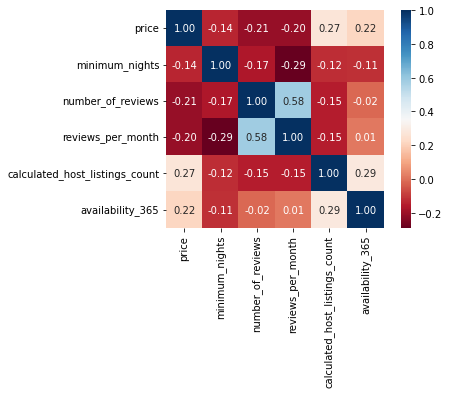

In [15]:
#Mapa de Calor

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [16]:
df_clean.room_type.value_counts()

Entire home/apt    2189
Private room        388
Hotel room           16
Shared room           8
Name: room_type, dtype: int64

In [17]:
df_clean.price

0       120
1        90
2        66
3        33
4       125
       ... 
2621     40
2622     62
2623    104
2624    144
2625    160
Name: price, Length: 2601, dtype: int64

In [18]:
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.841599
Private room       0.149173
Hotel room         0.006151
Shared room        0.003076
Name: room_type, dtype: float64

In [19]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
28801    213.118812
28804    193.345455
28803    185.262712
28805    178.042636
28704    172.632530
28732    170.065574
28715    162.358974
28806    142.679144
Name: price, dtype: float64

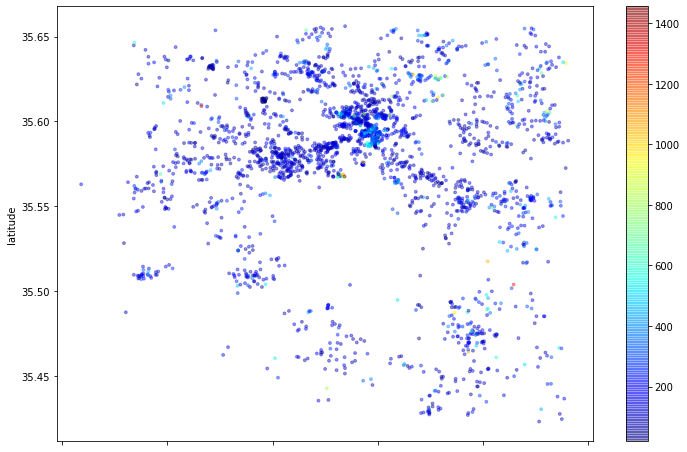

In [20]:
#Ocupação territorial 

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));